In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
# import warnings
# warnings.filterwarnings('ignore')


In [30]:

# Set style for plots
plt.style.use('ggplot')
# sns.set_palette('viridis')
sns.set_palette('colorblind')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
print("Loading sales data...")
sales_data = pd.read_csv('../sales_data.csv')

Loading sales data...


In [31]:

# Display basic information
print("\n--- Dataset Overview ---")
print(f"Dataset shape: {sales_data.shape}")
print(f"Number of unique distributors: {sales_data['distributor_id'].nunique()}")
print(f"Number of unique SKUs: {sales_data['sku'].nunique()}")
print(f"Time range: {sales_data['year'].min()}-{sales_data['quarter'].min()} to {sales_data['year'].max()}-{sales_data['quarter'].max()}")



--- Dataset Overview ---
Dataset shape: (10000, 20)
Number of unique distributors: 50
Number of unique SKUs: 200
Time range: 2020-1 to 2025-4


In [32]:

# Display first few rows
print("\n--- Sample Data ---")
sales_data.head()



--- Sample Data ---


,distributor_id,industry,sku,category,sales,avg_quarterly_sales,movement_category,quarter,year,total_quarter_sales,prev_quarter_sales,is_diwali,is_ganesh_chaturthi,is_gudi_padwa,is_eid,is_akshay_tritiya,is_dussehra_navratri,is_onam,is_christmas,time_idx
0,DIST036,Healthcare,MDH Garam Masala,Food,4726.09,6345.93,Fast Moving,2,2022,4726.09,9533.64,0,0,1,0,1,0,0,0,26645
1,DIST007,E-commerce,Shell Helix Ultra 4L,Automotive,4015.00,4141.90,Slow Moving,3,2023,4015.00,3504.12,0,1,0,1,0,1,1,0,4927
2,DIST012,Retail,PlayStation 5 Digital Edition,Toys,12386.14,13593.10,Medium,2,2024,12386.14,11915.21,0,0,1,1,1,0,0,0,8683
3,DIST034,E-commerce,PlayStation 5 Digital Edition,Toys,13198.10,13593.10,Medium,4,2020,13198.10,9534.84,1,0,0,1,0,1,0,1,25185
4,DIST009,Manufacturing,Britannia Good Day Cookies,Food,3148.80,4600.58,Medium,1,2023,3148.80,5176.39,0,0,1,1,0,0,0,0,6160


In [33]:

# Check column types and missing values
print("\n--- Data Types and Missing Values ---")
data_types = pd.DataFrame({
    'Data Type': sales_data.dtypes,
    'Missing Values': sales_data.isnull().sum(),
    'Missing Percentage': round(sales_data.isnull().sum() / len(sales_data) * 100, 2)
})
data_types



--- Data Types and Missing Values ---


,Data Type,Missing Values,Missing Percentage
distributor_id,object,0,0.0
industry,object,0,0.0
sku,object,0,0.0
category,object,0,0.0
sales,float64,0,0.0
avg_quarterly_sales,float64,0,0.0
movement_category,object,0,0.0
quarter,int64,0,0.0
year,int64,0,0.0
total_quarter_sales,float64,0,0.0


In [34]:

# Basic statistics for numerical columns
print("\n--- Numerical Features Statistics ---")
sales_data.describe()



--- Numerical Features Statistics ---


,sales,avg_quarterly_sales,quarter,year,total_quarter_sales,prev_quarter_sales,is_diwali,is_ganesh_chaturthi,is_gudi_padwa,is_eid,is_akshay_tritiya,is_dussehra_navratri,is_onam,is_christmas,time_idx
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7182.772839,7118.541734,2.505900,2022.507500,7182.772839,6876.898188,0.256700,0.242800,0.500500,0.500300,0.25020,0.499500,0.242800,0.256700,18836.523200
std,10039.786873,8755.962863,1.124318,1.719023,10039.786873,9621.539743,0.436834,0.428797,0.500025,0.500025,0.43315,0.500025,0.428797,0.436834,10987.796479
min,157.240000,365.180000,1.000000,2020.000000,157.240000,164.050000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000
25%,2017.430000,2366.740000,1.000000,2021.000000,2017.430000,1940.432500,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9294.750000
50%,4109.320000,4630.700000,2.000000,2023.000000,4109.320000,3930.810000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,18851.000000
75%,8242.005000,8039.470000,4.000000,2024.000000,8242.005000,8021.147500,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,28331.250000
max,145340.320000,68246.140000,4.000000,2025.000000,145340.320000,154396.010000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,37966.000000


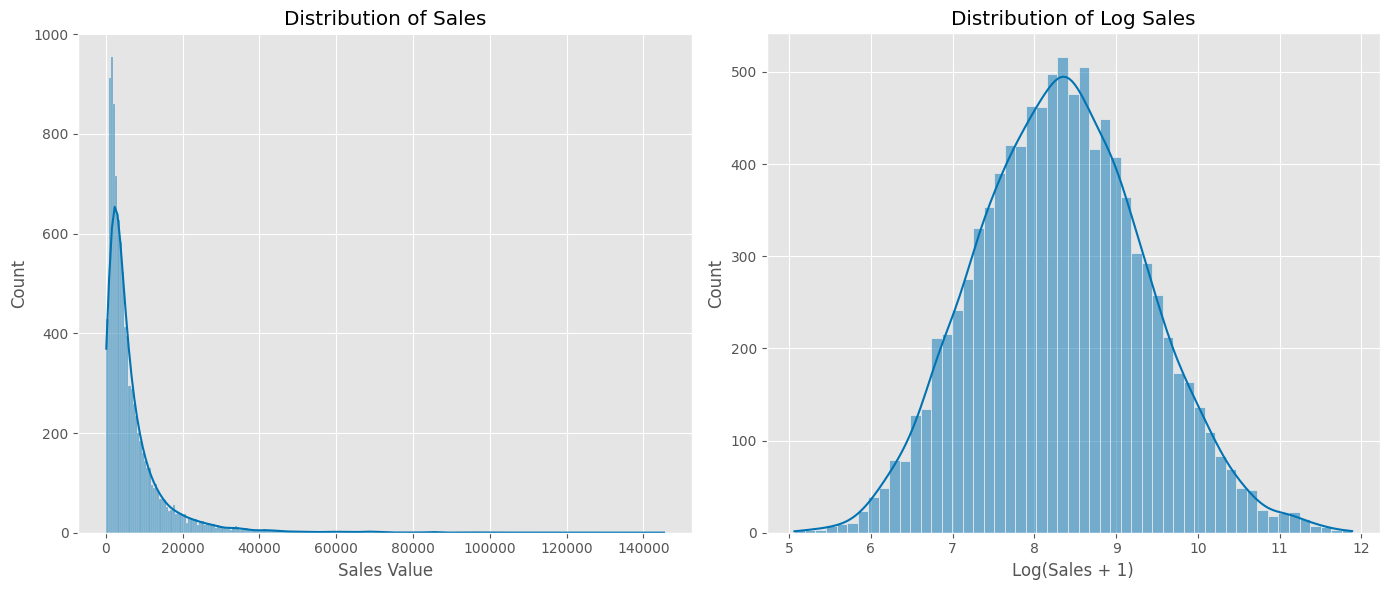

In [35]:

# Distribution of sales
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(sales_data['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Value')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(sales_data['sales']), kde=True)
plt.title('Distribution of Log Sales')
plt.xlabel('Log(Sales + 1)')
plt.tight_layout()
plt.show()


In [36]:

# Category-based analysis
print("\n--- Category Analysis ---")
category_sales = sales_data.groupby('category')['sales'].agg(['mean', 'median', 'sum', 'count']).sort_values('sum', ascending=False)
category_sales



--- Category Analysis ---


,mean,median,sum,count
category,,,,
Apparel,11239.837444,5069.680,10070894.35,896
Automotive,10291.159632,4602.040,8119724.95,789
Paint and ancillaries,6869.256636,4653.755,6759348.53,984
Food,8036.023673,4889.510,6147558.11,765
Toys,6586.250022,4704.720,5894693.77,895
Beverages,8645.220693,5677.190,5489715.14,635
Electronics,7278.446850,4158.275,5429721.35,746
Sports,6521.698380,2435.000,4630405.85,710
Pet Supplies,5169.749781,3294.450,4492512.56,869


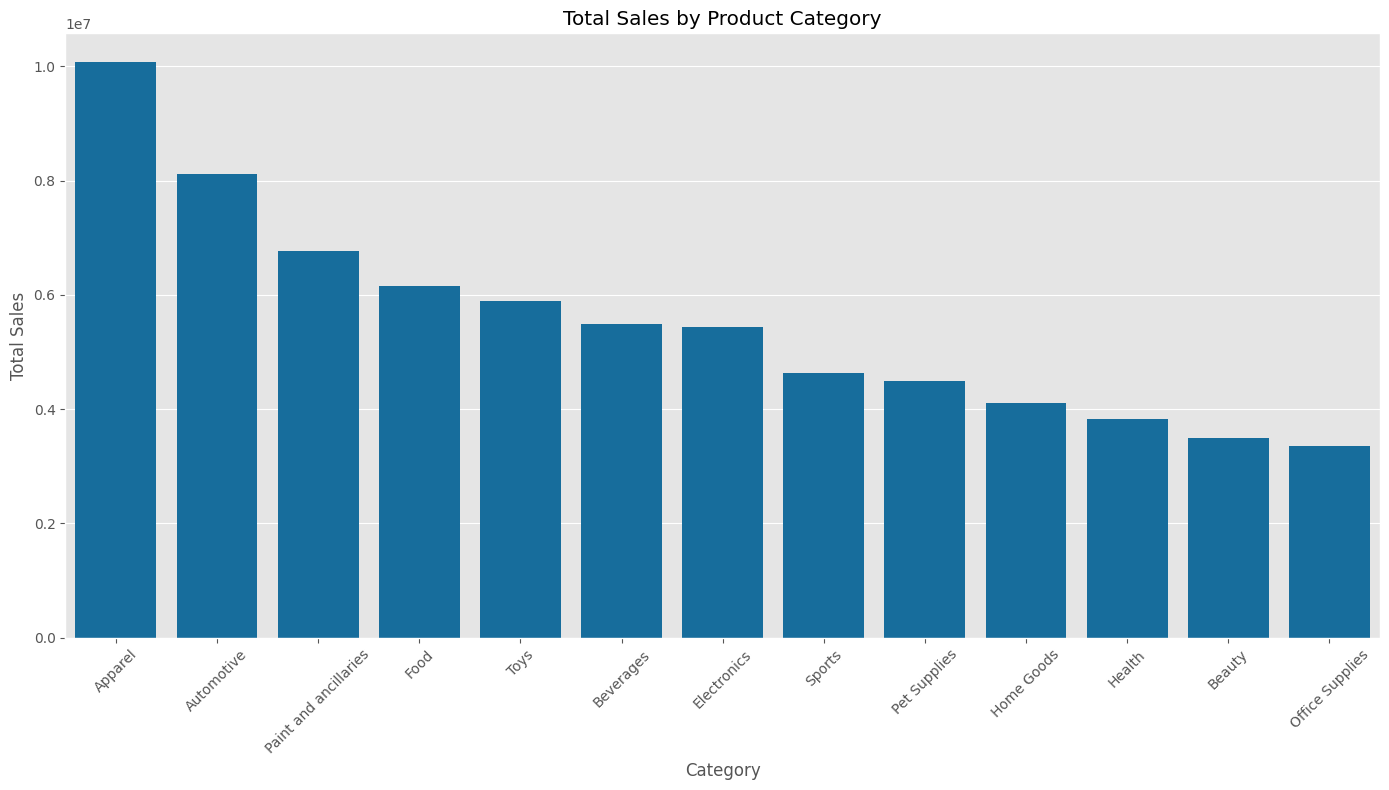

In [37]:

# Plot category sales
plt.figure(figsize=(14, 8))
sns.barplot(x=category_sales.index, y=category_sales['sum'], order=category_sales.index)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


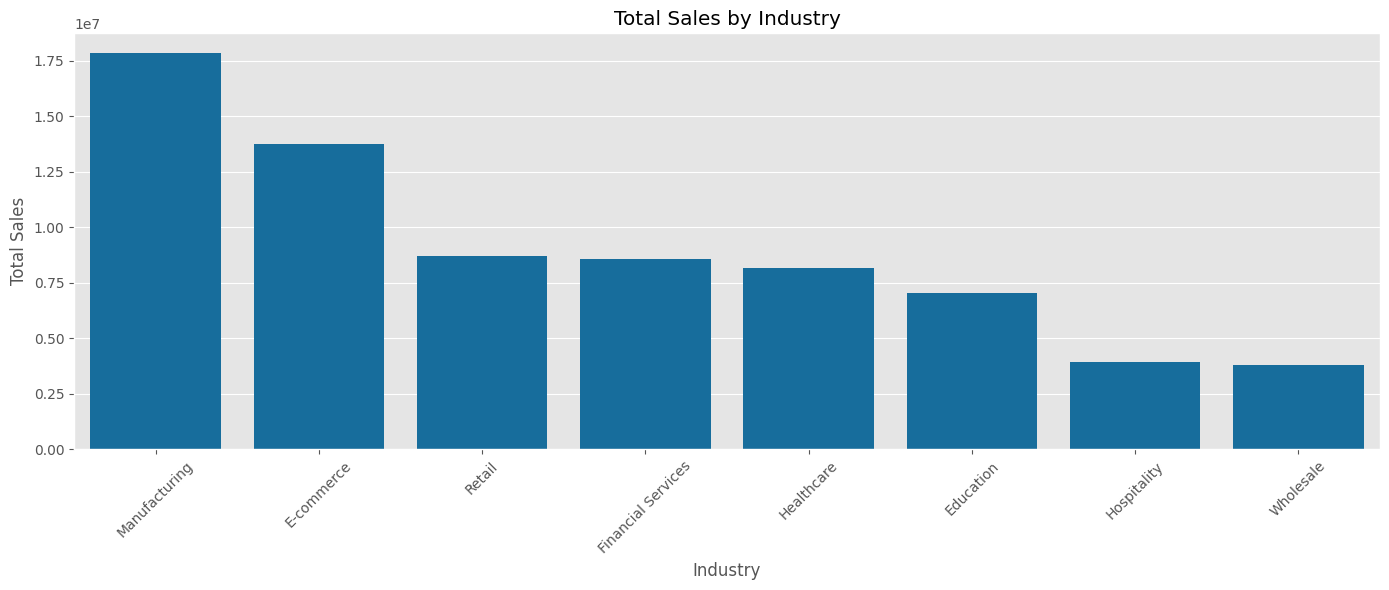

In [38]:

# Industry-based analysis
industry_sales = sales_data.groupby('industry')['sales'].agg(['mean', 'median', 'sum', 'count']).sort_values('sum', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=industry_sales.index, y=industry_sales['sum'], order=industry_sales.index)
plt.title('Total Sales by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



--- Temporal Patterns ---


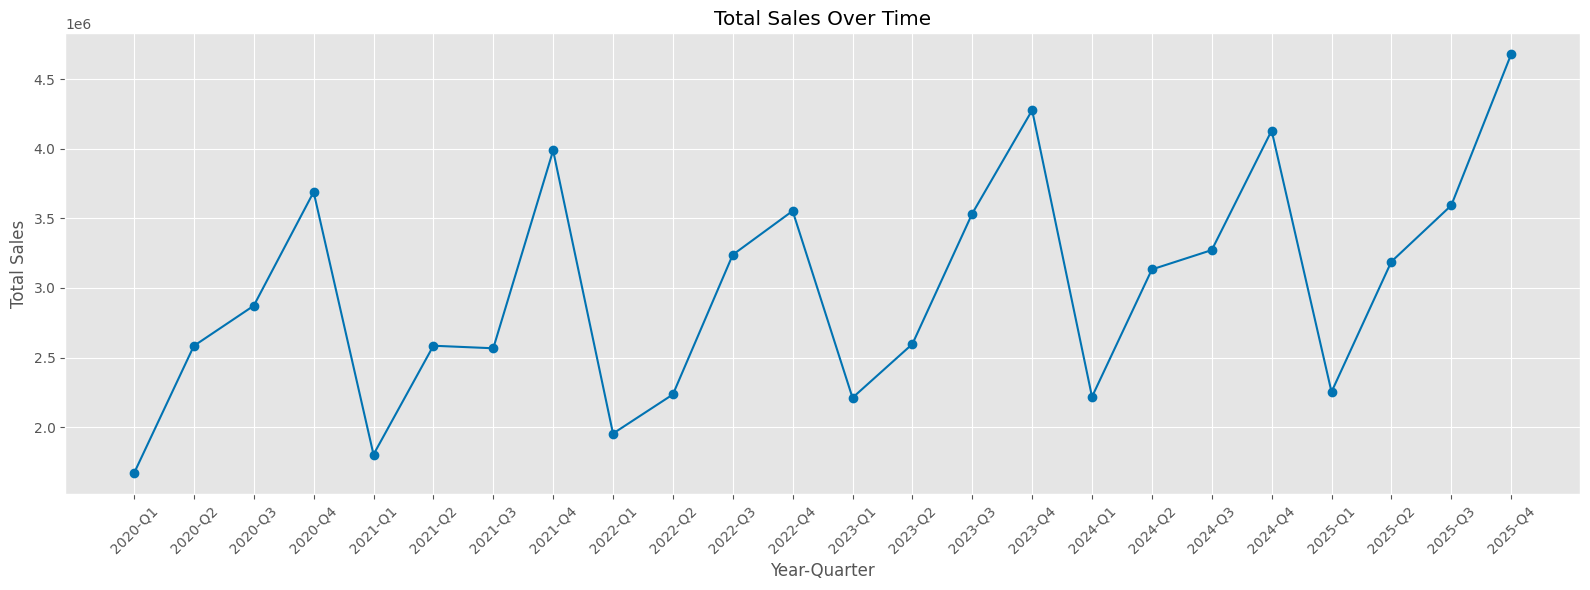

In [39]:

# Temporal patterns
print("\n--- Temporal Patterns ---")
sales_by_time = sales_data.groupby(['year', 'quarter'])['sales'].sum().reset_index()
sales_by_time['year_quarter'] = sales_by_time['year'].astype(str) + '-Q' + sales_by_time['quarter'].astype(str)
sales_by_time = sales_by_time.sort_values(['year', 'quarter'])

plt.figure(figsize=(16, 6))
plt.plot(sales_by_time['year_quarter'], sales_by_time['sales'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


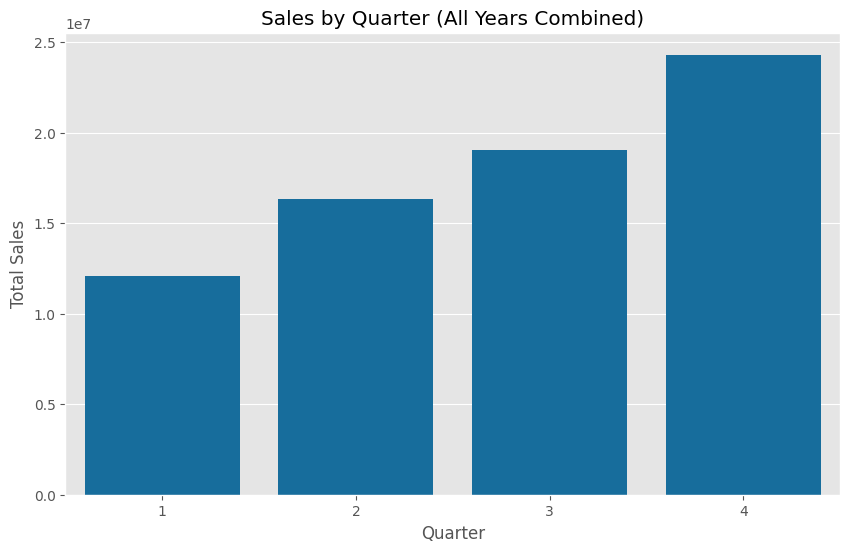

In [40]:

# Quarterly sales patterns
quarterly_sales = sales_data.groupby('quarter')['sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values)
plt.title('Sales by Quarter (All Years Combined)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True, axis='y')
plt.show()


In [41]:

# Festival impact analysis
print("\n--- Festival Impact Analysis ---")
festival_columns = ['is_diwali', 'is_ganesh_chaturthi', 'is_gudi_padwa', 'is_eid', 
                    'is_akshay_tritiya', 'is_dussehra_navratri', 'is_onam', 'is_christmas']

festival_impact = pd.DataFrame()
for festival in festival_columns:
    festival_impact[festival] = [
        sales_data[sales_data[festival] == 1]['sales'].mean(),
        sales_data[sales_data[festival] == 0]['sales'].mean(),
        sales_data[sales_data[festival] == 1]['sales'].mean() / sales_data[sales_data[festival] == 0]['sales'].mean() - 1
    ]
    
festival_impact.index = ['With Festival', 'Without Festival', 'Impact (%)']
festival_impact = festival_impact.transpose()
festival_impact['Impact (%)'] = festival_impact['Impact (%)'] * 100
festival_impact = festival_impact.sort_values('Impact (%)', ascending=False)



--- Festival Impact Analysis ---


/tmp/ipykernel_11269/1540668269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=festival_impact.index, y=festival_impact['Impact (%)'], palette='colorblind')


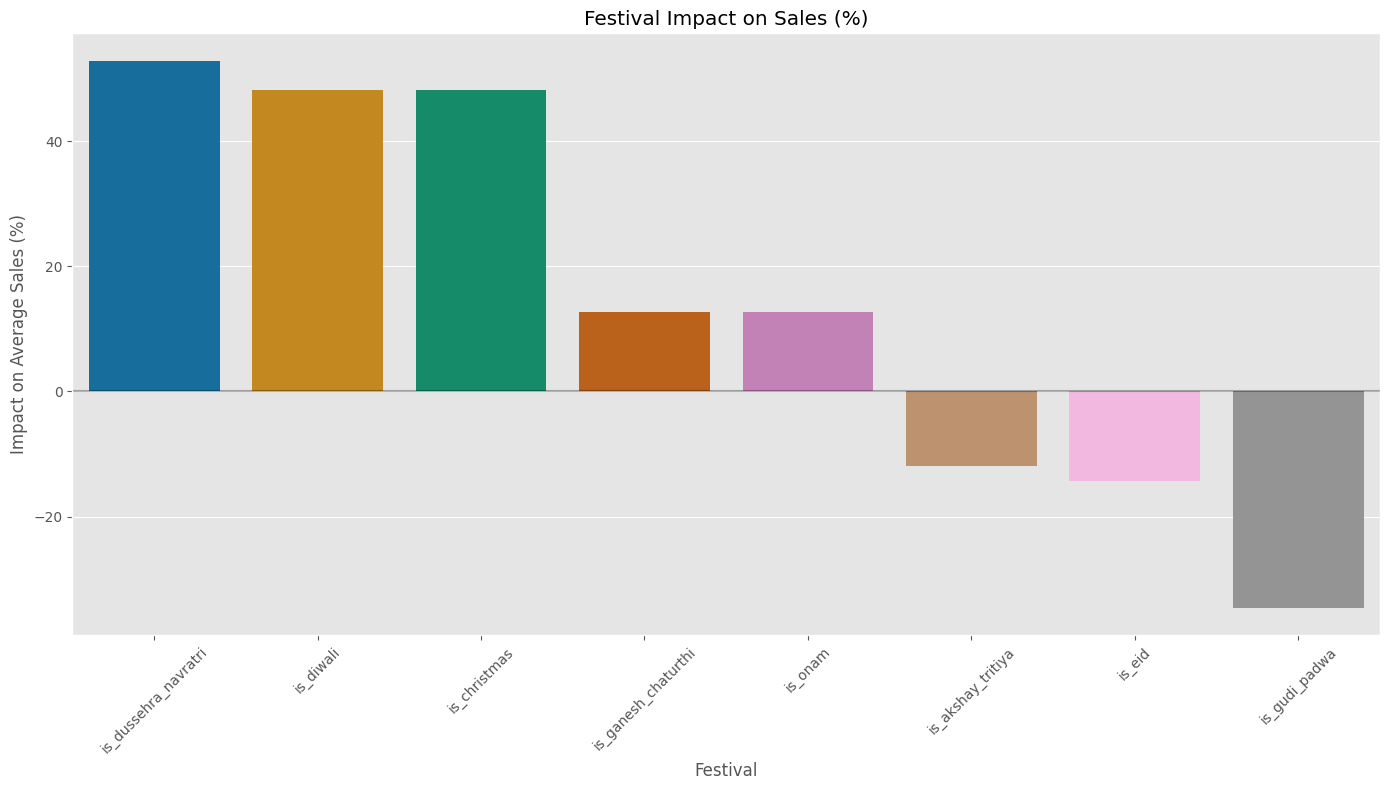

In [42]:

plt.figure(figsize=(14, 8))
sns.barplot(x=festival_impact.index, y=festival_impact['Impact (%)'], palette='colorblind')
plt.title('Festival Impact on Sales (%)')
plt.xlabel('Festival')
plt.ylabel('Impact on Average Sales (%)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


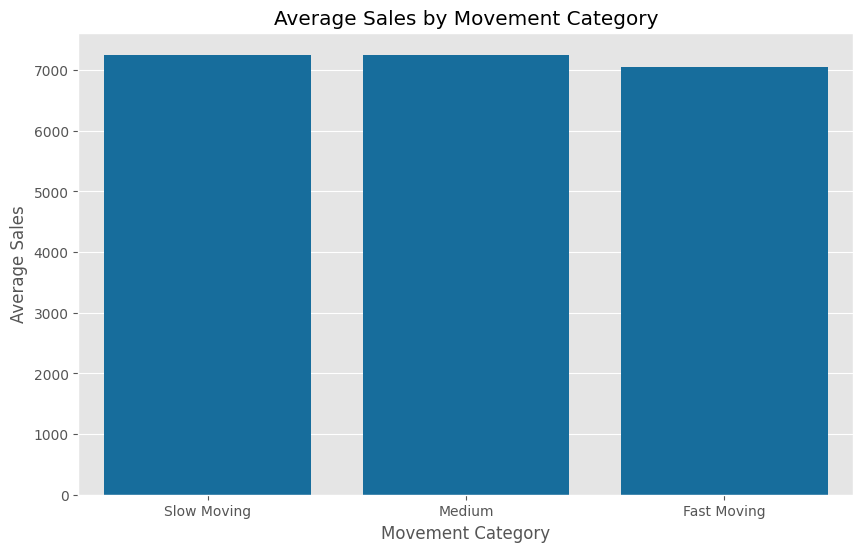

In [43]:

# Movement category analysis
movement_cat = sales_data.groupby('movement_category')['sales'].agg(['mean', 'median', 'count']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='movement_category', y='mean', data=movement_cat, order=['Slow Moving', 'Medium', 'Fast Moving'])
plt.title('Average Sales by Movement Category')
plt.xlabel('Movement Category')
plt.ylabel('Average Sales')
plt.grid(True, axis='y')
plt.show()


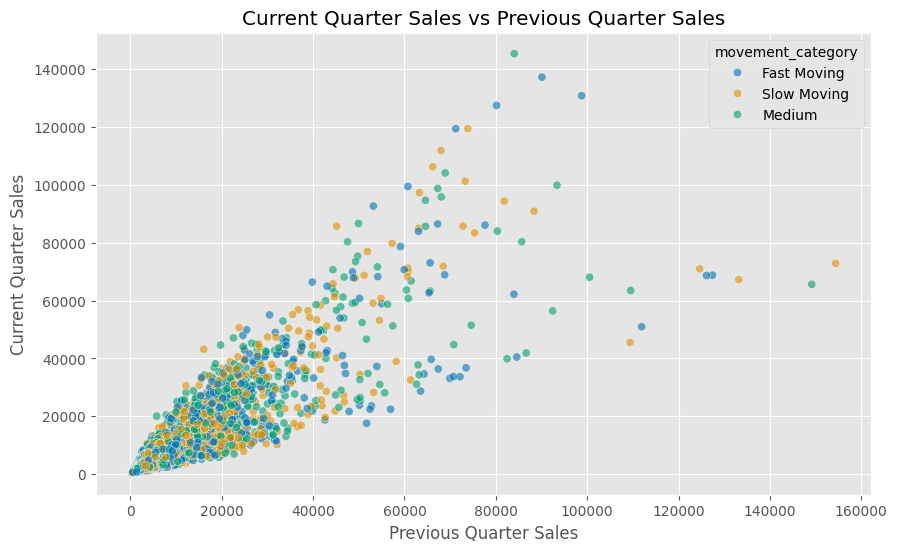

In [44]:

# Previous quarter correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prev_quarter_sales', y='sales', data=sales_data, alpha=0.6, hue='movement_category')
plt.title('Current Quarter Sales vs Previous Quarter Sales')
plt.xlabel('Previous Quarter Sales')
plt.ylabel('Current Quarter Sales')
plt.grid(True)
plt.show()


In [45]:

print(f"Correlation between current and previous quarter sales: {sales_data['sales'].corr(sales_data['prev_quarter_sales']):.3f}")


Correlation between current and previous quarter sales: 0.878


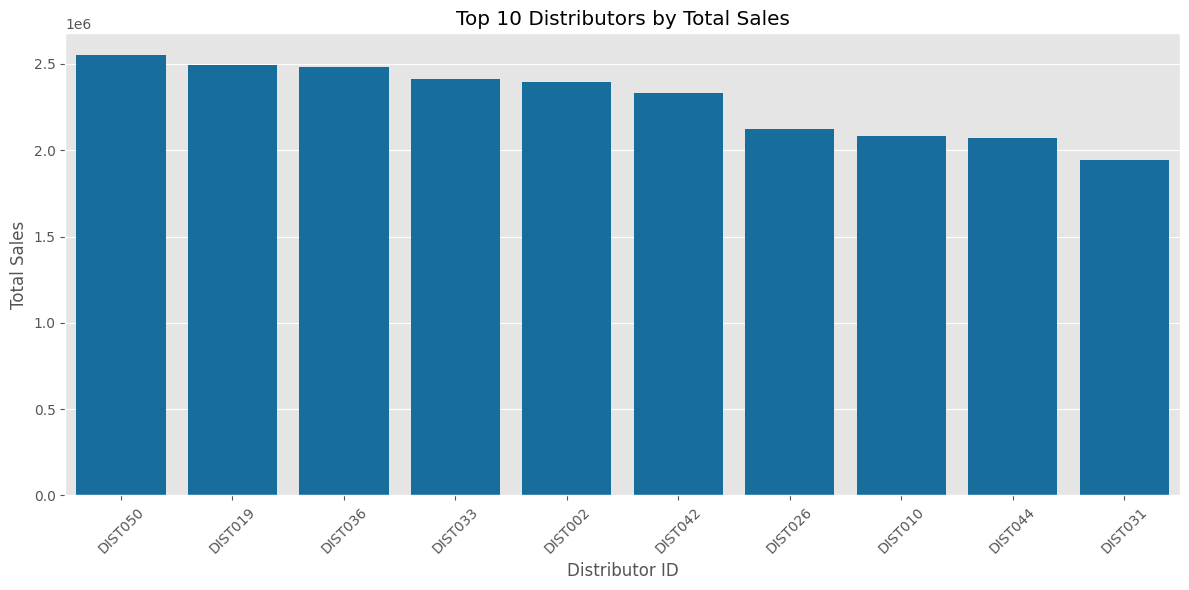

In [46]:

# Analyzing top distributors
top_distributors = sales_data.groupby('distributor_id')['sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='distributor_id', y='sales', data=top_distributors)
plt.title('Top 10 Distributors by Total Sales')
plt.xlabel('Distributor ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


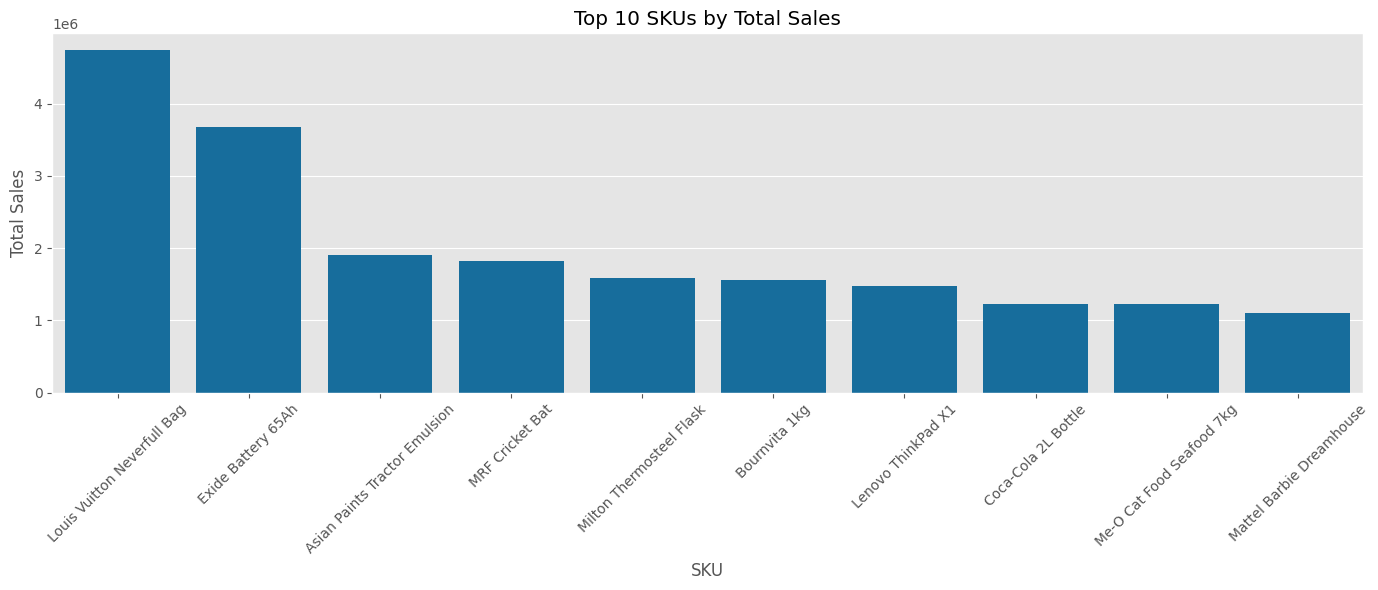

In [47]:

# SKU popularity
top_skus = sales_data.groupby('sku')['sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='sku', y='sales', data=top_skus)
plt.title('Top 10 SKUs by Total Sales')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [48]:

# Insights for TFT model
print("\n--- Insights for TFT Model ---")
print("1. Key static categorical variables: 'distributor_id', 'industry', 'sku', 'category', 'movement_category'")
print("2. Key time-varying variables: 'sales', 'prev_quarter_sales', 'total_quarter_sales', 'avg_quarterly_sales'")
print("3. Festival flags are important seasonal indicators")
print("4. Time index is available as 'time_idx' for temporal ordering")
print("5. Target variable: 'sales' for next period")



--- Insights for TFT Model ---
1. Key static categorical variables: 'distributor_id', 'industry', 'sku', 'category', 'movement_category'
2. Key time-varying variables: 'sales', 'prev_quarter_sales', 'total_quarter_sales', 'avg_quarterly_sales'
3. Festival flags are important seasonal indicators
4. Time index is available as 'time_idx' for temporal ordering
5. Target variable: 'sales' for next period


In [49]:

# Summary
print("\n--- Summary of Findings ---")
print("• Sales data shows distinct patterns by product category, industry, and time")
print("• Festivals have measurable impact on sales performance")
print("• Previous quarter sales are strong predictors of current sales")
print("• The data includes necessary variables for TFT modeling")
print("• Next steps: Feature engineering and preparing data for TFT format")


--- Summary of Findings ---
• Sales data shows distinct patterns by product category, industry, and time
• Festivals have measurable impact on sales performance
• Previous quarter sales are strong predictors of current sales
• The data includes necessary variables for TFT modeling
• Next steps: Feature engineering and preparing data for TFT format
